In [28]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
data = pd.read_csv("../data/drugsComTrain_top_conditions.csv")

In [29]:
data["text_length"] = data["review"].transform(lambda x: len(nltk.word_tokenize(x)))

In [30]:
data["normal_rating"]=(data["rating"]-data["rating"].mean())/data["rating"].std()
data["normal_text_length"]=(data["text_length"]-data["text_length"].mean())/data["text_length"].std()

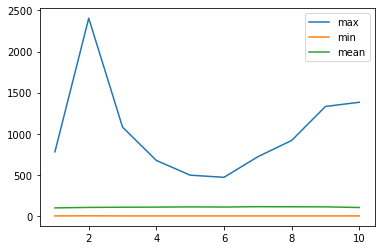

In [47]:
def normalize(x):
    x = (x-np.mean(x))/np.linalg.norm(x)
    return x

groupby_ratings = data.groupby("rating")
length_mean = groupby_ratings["text_length"].mean()
length_sum = groupby_ratings["text_length"].sum()
length_max = groupby_ratings["text_length"].max()
length_min = groupby_ratings["text_length"].min()
#length_mean = normalize(length_mean)
#length_sum = normalize(length_sum)
#length_min = normalize(length_min)
#length_max = normalize(length_max)

plt.plot(range(1,11), length_max, label="max")
plt.plot(range(1,11), length_min, label="min")
plt.plot(range(1,11), length_mean, label="mean")
#plt.plot(range(1,11), length_sum, label="sum")
plt.legend()
plt.show()



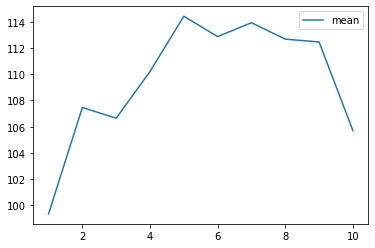

In [32]:
data_test = pd.read_csv("../data/drugsComTest_top_conditions.csv")
data_test["text_length"] = data_test["review"].transform(lambda x: len(nltk.word_tokenize(x)))
groupby_ratings_test = data_test.groupby("rating")
length_mean = groupby_ratings_test["text_length"].mean()
plt.plot(range(1,11), length_mean, label="mean")
plt.legend()
plt.show()

In [34]:
data_test["normal_rating"]=(data_test["rating"]-data_test["rating"].mean())/data_test["rating"].std()
data_test["normal_text_length"]=(data_test["text_length"]-data_test["text_length"].mean())/data_test["text_length"].std()

In [35]:
parabola_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                           ('linear', LinearRegression())])

train_lengths = data["normal_text_length"].to_numpy().reshape(-1, 1)
train_ratings = data["normal_rating"].to_numpy().reshape(-1, 1)
test_lengths = data_test["normal_text_length"].to_numpy().reshape(-1, 1)
test_ratings = data_test["normal_rating"].to_numpy().reshape(-1, 1)


regression_result = parabola_model.fit(train_ratings,train_lengths)
test_score = regression_result.score(test_ratings, test_lengths)
test_score

0.007104544936116897

<function matplotlib.pyplot.show(close=None, block=None)>

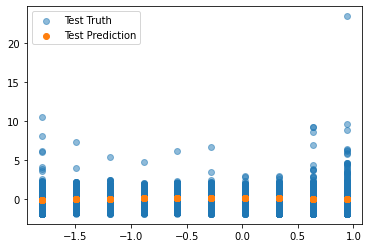

In [42]:
plt.scatter(test_ratings, test_lengths, label="Test Truth", alpha=0.5)
plt.scatter(test_ratings, regression_result.predict(test_ratings), label="Test Prediction")

plt.legend()
plt.show

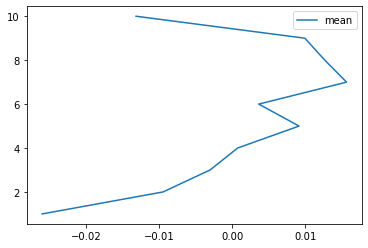